In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [83]:
data = yf.download("SOL-USD", start="2021-04-01", end="2022-04-01")

[*********************100%***********************]  1 of 1 completed


In [84]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,19.101685,19.795801,18.156256,19.465229,19.465229,206011018
2021-04-01,19.415682,20.361540,18.844246,19.084902,19.084902,173731886
2021-04-02,19.084631,19.824574,18.568419,19.810223,19.810223,131061660
2021-04-03,19.796452,23.827188,19.789450,22.552277,22.552277,483057740
2021-04-04,22.527370,25.569532,22.212969,24.061323,24.061323,426557980


In [85]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,101.773697,107.298714,99.269096,107.084221,107.084221,1572329892
2022-03-28,107.077965,113.175949,105.477875,106.465256,106.465256,2877146388
2022-03-29,106.327988,115.275719,105.999191,111.710312,111.710312,3052274877
2022-03-30,111.690254,124.605003,107.767258,120.699486,120.699486,3908170428
2022-03-31,120.681557,128.930115,120.197830,122.661461,122.661461,4115229587


In [86]:
data['Adj Close'].head()

Date
2021-03-31    19.465229
2021-04-01    19.084902
2021-04-02    19.810223
2021-04-03    22.552277
2021-04-04    24.061323
Name: Adj Close, dtype: float64

In [87]:
import numpy as np
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.019538800394223208,
 0.038004954035010044,
 0.13841611159048367,
 0.06691326913786734,
 -0.044762281409137634]

In [88]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.01973220617791251,
 0.0373005574057278,
 0.12963792053109544,
 0.06476968423407432,
 -0.045795049486415655]

In [89]:
datanr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = datanr.mean() * len(datanr)
nv = datanr.std() * (len(datanr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.84294512 and its annulized volatility is 1.41476728


In [90]:
datalr = pd.DataFrame(log_return, columns = ['log']) 
lr = datalr.mean() * len(datalr)
lv = datalr.std() * (len(datalr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.84079846 and its annulized volatility is 1.41661606


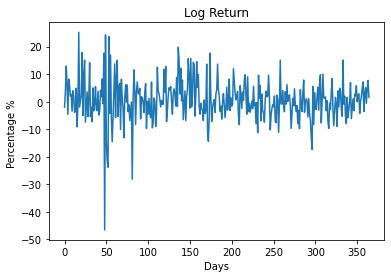

In [91]:
fig = plt.figure()
plt.plot(datalr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

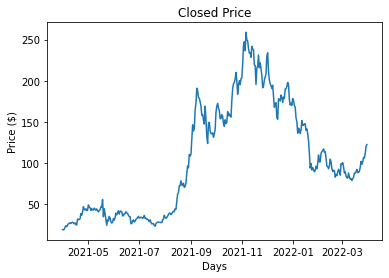

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

In [93]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 122.66


# Binomial Tree

In [94]:
S0 = 122.66                 # spot stock price
K = 130                 # strike
T =  4/52               # maturity 
r =  0.51             # risk free rate 
sigma = 1.41           # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "call"         # payoff 

In [95]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [96]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [97]:
S

array([[122.66      , 149.149345  , 181.35926229, 220.52515229,
        268.14920935],
       [  0.        , 100.8752375 , 122.66      , 149.149345  ,
        181.35926229],
       [  0.        ,   0.        ,  82.95951037, 100.8752375 ,
        122.66      ],
       [  0.        ,   0.        ,   0.        ,  68.22566698,
         82.95951037],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         56.1085958 ]])

In [98]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4763152328777397

In [99]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        138.14920935],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         51.35926229],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [100]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 18.01614226,  32.27163002,  55.85827878,  91.79392027,
        138.14920935],
       [  0.        ,   5.38919514,  11.42585913,  24.22444418,
         51.35926229],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [101]:
print('European ' + payoff, str( V[0,0]))

European call 18.01614225583477


# Black Scholes Model

In [108]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [109]:
call = euro_option_bs(122.66, 130, 4/52, 0.51, 1.41,'call')
print('The BS call price is', round(call, 2))

The BS call price is 18.05


In [110]:
S = np.linspace(110,140,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],130, 4/52, 0.51, 1.41,'call')

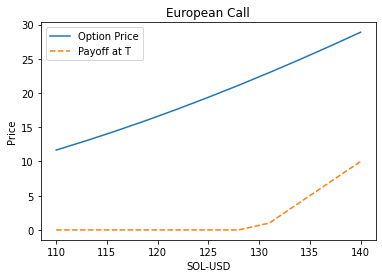

In [111]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-130,0), '--')
plt.xlabel('SOL-USD')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# Delta

In [112]:
from mpl_toolkits.mplot3d import Axes3D

In [113]:
def delta(S, K, T, r, q, vol,payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [114]:
delta(122.66, 130, 4/52, 0.51, 0, 1.41,'call')

0.5585264786873586

In [115]:
S = np.linspace(110,140,55)
T = np.linspace(2/52,4/52,55)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 130, T[i], 0.51, 0, 1.41, 'call')

/var/folders/x1/ry64pgdx6bx1jt4_whz7d2_80000gn/T/ipykernel_3565/3343817350.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


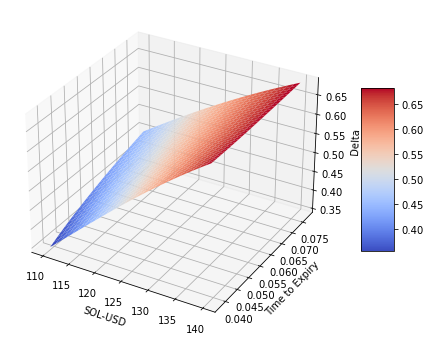

In [116]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('SOL-USD')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [117]:
d = delta(122.66, 130, 4/52, 0.51, 0, 1.41,'call')
print('The value of Delta is', d.round(4),'.','If the SOL-USD price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')


The value of Delta is 0.5585 . If the SOL-USD price increase 1 dollar, then the value of the option will increase $ 0.5585 .


# Gamma


In [118]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [119]:
gamma(122.66, 130, 4/52, 0.51, 0, 1.41, 'call')

0.008227205790269096

In [120]:
S = np.linspace(110,140,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],130, 4/52, 0.51, 0, 1.41, 'call')

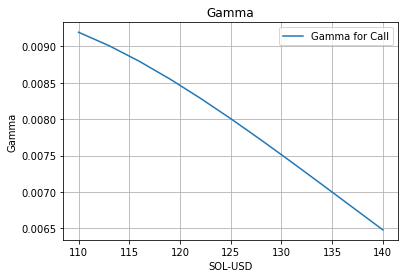

In [121]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('SOL-USD')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

# Speed

In [122]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [123]:
speed(122.66, 130, 4/52, 0.51, 0, 1.41, 'call')

-2.5606666813719863e-05

In [124]:
S = np.linspace(110,140,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],130, 4/52, 0.51, 0, 1.41, 'call' )

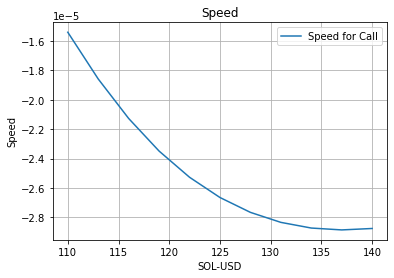

In [125]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('SOL-USD')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

# Theta


In [126]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [127]:
theta(122.66, 130, 4/52, 0.51, 0, 1.41, 'call')

148.78015791275564

In [128]:
S = np.linspace(110,140, 40)
T = np.linspace(2/52,4/52, 40)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 130, T[i], 0.51, 0, 1.41, 'call')
    

/var/folders/x1/ry64pgdx6bx1jt4_whz7d2_80000gn/T/ipykernel_3565/947837172.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


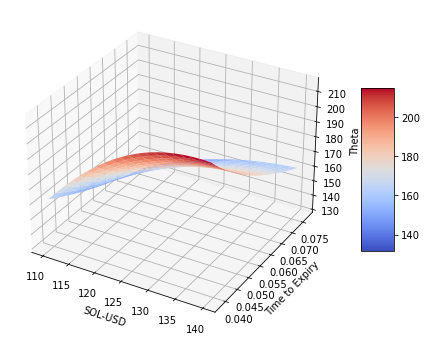

In [129]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('SOL-USD')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [130]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [131]:
rho(122.66, 130, 4/52, 0.51, 0, 1.41, 'call')

3.881514053050771

In [132]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(122.66, 130, 4/52, r[i], 0, 1.41, 'call')

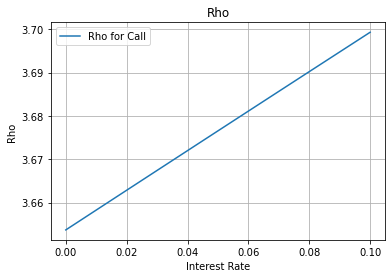

In [133]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

# Vega

In [134]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [140]:
vega(122.66, 130, 4/52, 0.51, 0, 1.41, 'call')

13.425610446375238

In [135]:
S = np.linspace(110,140, 55)
T = np.linspace(2/52,4/52,55)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 130, T[i], 0.51, 0, 1.41 , 'call')

/var/folders/x1/ry64pgdx6bx1jt4_whz7d2_80000gn/T/ipykernel_3565/4087938179.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


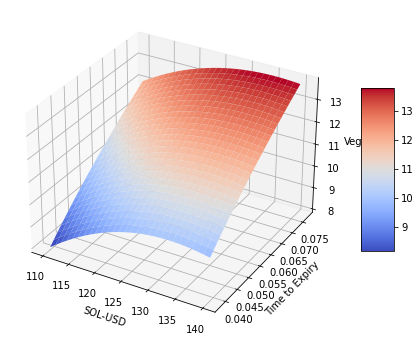

In [136]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('SOL-USD')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [141]:
v = vega(122.66, 130, 4/52, 0.51, 0, 1.41, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the SOL-USD will increase $', v.round(4)*0.01, '.')

The value of Vega is 13.4256 . If the volatility increases 1%, then the value of the SOL-USD will increase $ 0.134256 .
